In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Load only relevant columns
use_cols = ["step", "type", "amount", "oldbalanceOrg", "newbalanceOrig",
            "oldbalanceDest", "newbalanceDest", "isFraud"]

df = pd.read_csv("Fraud.csv", usecols=use_cols, low_memory=True)

# Sample for EDA
df = df.sample(n=1_000_000, random_state=42)
print("Shape for EDA:", df.shape)


Shape for EDA: (1000000, 8)


In [7]:
# Transaction behavior features
df['orig_balance_diff'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['dest_balance_diff'] = df['newbalanceDest'] - df['oldbalanceDest']

# Flag empty accounts
df['orig_empty'] = (df['oldbalanceOrg'] == 0).astype(int)
df['dest_empty'] = (df['oldbalanceDest'] == 0).astype(int)

# Log transform skewed amount
df['amount_log'] = np.log1p(df['amount'])

# Time-based features
df['hour'] = df['step'] % 24
df['is_night'] = (df['hour'] < 6).astype(int)

# High-risk transaction types
df['is_transfer_cashout'] = df['type'].isin(['TRANSFER','CASH_OUT']).astype(int)


In [8]:
# Transaction behavior features
df['orig_balance_diff'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['dest_balance_diff'] = df['newbalanceDest'] - df['oldbalanceDest']

# Flag empty accounts
df['orig_empty'] = (df['oldbalanceOrg'] == 0).astype(int)
df['dest_empty'] = (df['oldbalanceDest'] == 0).astype(int)

# Log transform skewed amount
df['amount_log'] = np.log1p(df['amount'])

# Time-based features
df['hour'] = df['step'] % 24
df['is_night'] = (df['hour'] < 6).astype(int)

# High-risk transaction types
df['is_transfer_cashout'] = df['type'].isin(['TRANSFER','CASH_OUT']).astype(int)


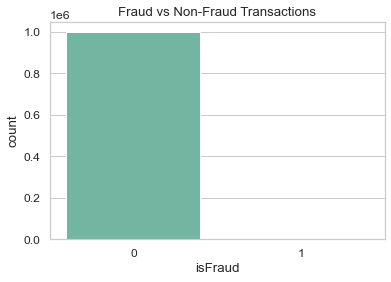

Fraud ratio: 0.0013 (~0.13%)


In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x='isFraud', data=df, palette='Set2')
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()

fraud_ratio = df['isFraud'].mean()
print(f"Fraud ratio: {fraud_ratio:.4f} (~{fraud_ratio*100:.2f}%)")


<Figure size 576x360 with 0 Axes>

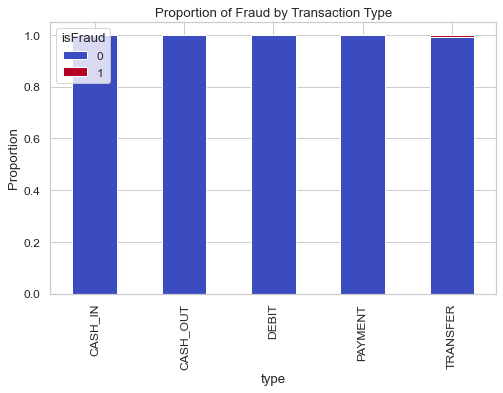

In [10]:
plt.figure(figsize=(8,5))
type_fraud = df.groupby(['type','isFraud']).size().unstack(fill_value=0)
type_fraud_pct = type_fraud.div(type_fraud.sum(axis=1), axis=0)
type_fraud_pct.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(8,5))
plt.ylabel("Proportion")
plt.title("Proportion of Fraud by Transaction Type")
plt.show()


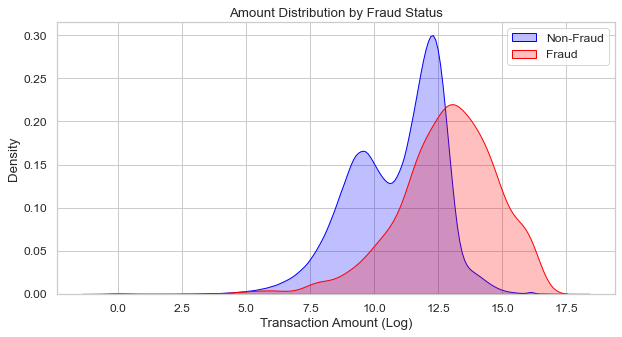

In [11]:
plt.figure(figsize=(10,5))
sns.kdeplot(df[df['isFraud']==0]['amount_log'], label='Non-Fraud', color='blue', fill=True)
sns.kdeplot(df[df['isFraud']==1]['amount_log'], label='Fraud', color='red', fill=True)
plt.xlabel("Transaction Amount (Log)")
plt.title("Amount Distribution by Fraud Status")
plt.legend()
plt.show()


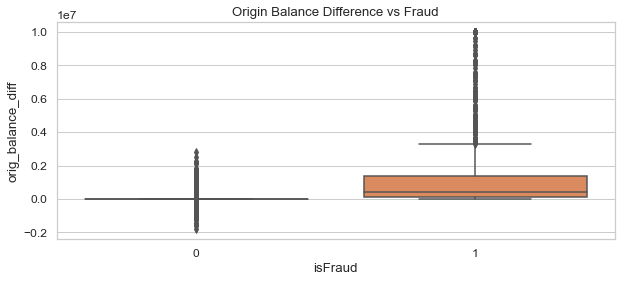

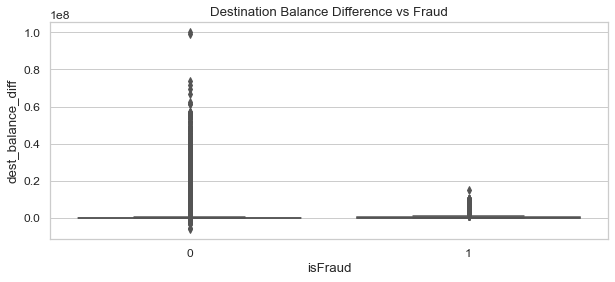

In [12]:
plt.figure(figsize=(10,4))
sns.boxplot(x='isFraud', y='orig_balance_diff', data=df)
plt.title("Origin Balance Difference vs Fraud")
plt.show()

plt.figure(figsize=(10,4))
sns.boxplot(x='isFraud', y='dest_balance_diff', data=df)
plt.title("Destination Balance Difference vs Fraud")
plt.show()


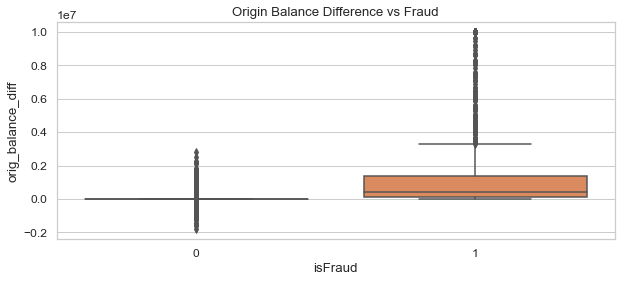

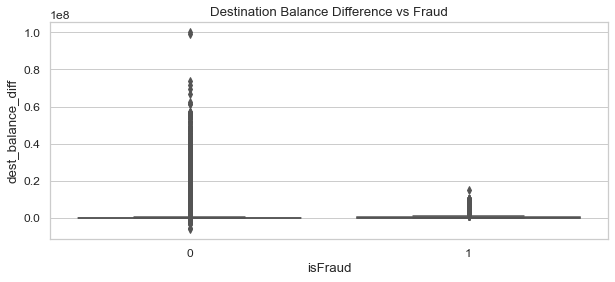

In [13]:
plt.figure(figsize=(10,4))
sns.boxplot(x='isFraud', y='orig_balance_diff', data=df)
plt.title("Origin Balance Difference vs Fraud")
plt.show()

plt.figure(figsize=(10,4))
sns.boxplot(x='isFraud', y='dest_balance_diff', data=df)
plt.title("Destination Balance Difference vs Fraud")
plt.show()


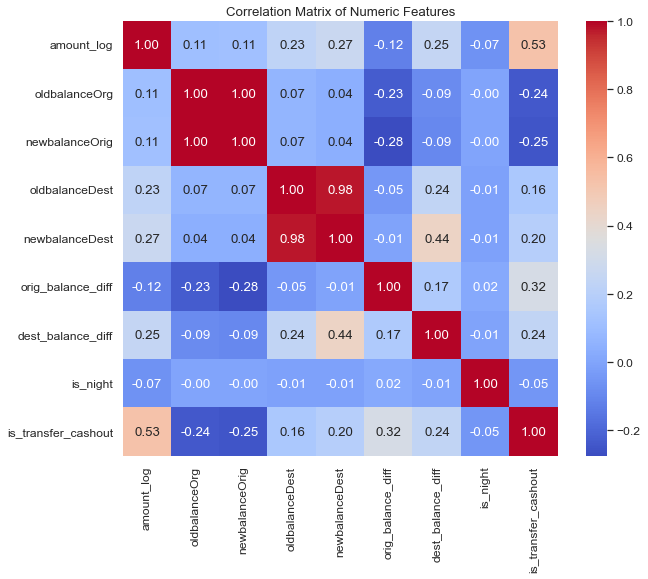

In [14]:
num_cols = ['amount_log','oldbalanceOrg','newbalanceOrig','oldbalanceDest',
            'newbalanceDest','orig_balance_diff','dest_balance_diff','is_night','is_transfer_cashout']

plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix of Numeric Features")
plt.show()


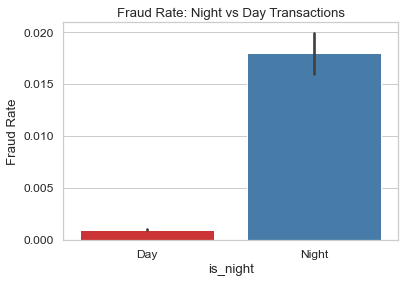

In [15]:
plt.figure(figsize=(6,4))
sns.barplot(x='is_night', y='isFraud', data=df, palette='Set1')
plt.xticks([0,1], ['Day','Night'])
plt.ylabel("Fraud Rate")
plt.title("Fraud Rate: Night vs Day Transactions")
plt.show()


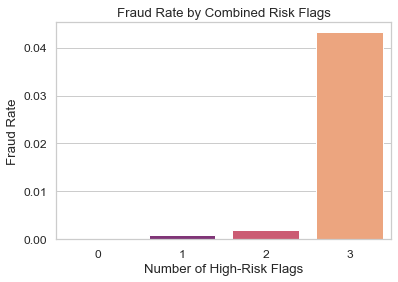

In [16]:
# Combine risk flags
df['high_risk'] = df[['orig_empty','dest_empty','is_transfer_cashout','is_night']].sum(axis=1)

plt.figure(figsize=(6,4))
sns.barplot(x=df.groupby('high_risk')['isFraud'].mean().index,
            y=df.groupby('high_risk')['isFraud'].mean().values, palette='magma')
plt.xlabel("Number of High-Risk Flags")
plt.ylabel("Fraud Rate")
plt.title("Fraud Rate by Combined Risk Flags")
plt.show()


In [ ]:
plt.figure(figsize=(10,6))
sns.kdeplot(
    x=df[df['isFraud']==0]['amount_log'],
    y=df[df['isFraud']==0]['orig_balance_diff'],
    cmap="Blues", fill=True, thresh=0.05, label="Non-Fraud"
)
sns.kdeplot(
    x=df[df['isFraud']==1]['amount_log'],
    y=df[df['isFraud']==1]['orig_balance_diff'],
    cmap="Reds", fill=True, thresh=0.05, label="Fraud"
)
plt.xlabel("Log Amount")
plt.ylabel("Origin Balance Difference")
plt.title("2D KDE: Fraud vs Non-Fraud")
plt.legend()
plt.show()
